In [4]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import utils

In [218]:
## Maximum K value to test when visualizing the loss values of K-Means algorithm on data
MAX_K = 10

## Ideal K values for each dataset, in order when pulled from world_indices.csv; found by plotting loss values
## for different values of K in visualize_kmeans() and then using elbow method to determine ideal K value
IDEAL_K_1D = np.array([3, 3, 3, 3, 4, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 4, 4, 2])

## Parameters are boolean variables to determine what code should run; if `visualize_elbow` is True, the loss values of each
## dataset will be plotted. Otherwise, the data will be assigned clusters using the K-Means algorithm with the number of
## clusters taken from `IDEAL_K_1D`. If `visualize_ideal_k` is True, these clusters will be plotted.
def run_1D_kmeans(visualize_elbow=False, visualize_ideal_k=False):
    # Loads data from world_indices.csv
    df = load_csv('world_indices.csv')
    data = df.to_numpy()

    # Scales all data to be between 0 and 1
    data[:, 2:] = (data[:, 2:] - np.amin(data[:, 2:], axis=0)[None, :]) / (np.amax(data[:, 2:], axis=0) - np.amin(data[:, 2:], axis=0))[None, :]
    
    if visualize_elbow:
        for x in range(2, np.shape(data)[1]):
            visualize_kmeans(data[:, x].reshape(-1, 1), df.columns[x])
    else:
        loss = np.zeros(np.shape(data)[1] - 2)
        for x in range(2, np.shape(data)[1]):
            loss[x - 2] = perform_ideal_kmeans_1D(data[:, x], df.columns[x], IDEAL_K_1D[x - 2], visualize_ideal_k)
        print('Average Loss For Scaled Data: ' + str(np.mean(loss)))

def visualize_kmeans(data, name):
    loss = np.zeros(MAX_K)
    loss[0] = float("inf")
    for K in range(1, MAX_K):
        kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
        loss[K] = kmeans.inertia_
    plt.plot(loss)
    plt.xlabel('Number of Clusters')
    plt.ylabel('Loss Value')
    plt.title(name)
    plt.show()

def perform_ideal_kmeans_2D(data, x_name, y_name, ideal_k, visualize_ideal_k, col1, col2):
    kmeans = KMeans(n_clusters=ideal_k, random_state=0).fit(data[[col1, col2]])
    print(data[col1])
    print(data[col2])
    clusters = kmeans.labels_
    centroids = kmeans.cluster_centers_
    print(centroids)
    if visualize_ideal_k:
        plt.scatter(data[col1], data[col2], c=clusters, cmap='rainbow')
        plt.title('Visualization of K = ' + str(ideal_k) + " for Indices " + x_name + " and " + y_name, fontsize=15)
        plt.xlabel(x_name)
        plt.ylabel(y_name)
        plt.show()
    return kmeans.inertia_

In [193]:
df = load_csv("world_indices.csv")

print(df.columns)

Index(['Id', 'country_id', 'Human Development Index HDI-2014',
       'Gini coefficient 2005-2013',
       'Adolescent birth rate 15-19 per 100k 20102015',
       'Carbon dioxide emissionsAverage annual growth',
       'Carbon dioxide emissions per capita 2011 Tones',
       'Change forest percentable 1900 to 2012', 'Consumer price index 2013',
       'Domestic food price level 2009 2014 index',
       'Domestic food price level 2009-2014 volitility index',
       'Electrification rate or population',
       'Foreign direct investment net inflows percentage GDP 2013',
       'Fossil fuels percentage of total 2012', 'Gender Inequality Index 2014',
       'General government final consumption expenditure - Perce of GDP 2005-2013',
       'Gross domestic product GDP 2013',
       'Gross domestic product GDP percapta',
       'Gross national income GNI per capita - 2011  Dollars',
       'Homicide rate per 100k people 2008-2012',
       'Infant Mortality 2013 per thousands',
       'Intern

0      0.943877
1      0.934958
2      0.929613
3      0.923328
4      0.921794
         ...   
183    0.399928
184    0.391906
185    0.390899
186    0.350131
187    0.348254
Name: Human Development Index HDI-2014, Length: 188, dtype: float64
0      26.83
1      34.01
2      32.35
3      26.88
4      28.87
       ...  
183    33.27
184    43.30
185    36.75
186    56.30
187    31.16
Name: Gini coefficient 2005-2013, Length: 188, dtype: float64
[[ 0.76851034 30.23057096]
 [ 0.642928   46.16837037]
 [ 0.65512364 37.8837833 ]
 [ 0.59570157 59.6725    ]]


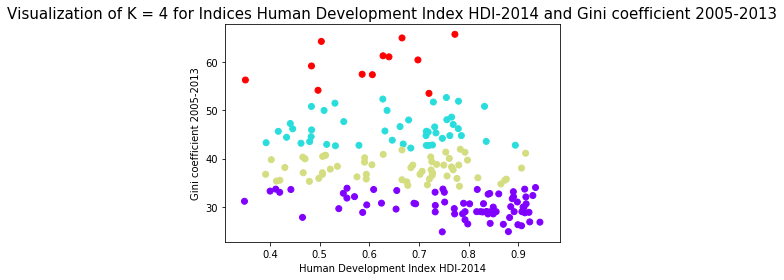

1276.7448399984278

In [241]:
perform_ideal_kmeans_2D(df,'Human Development Index HDI-2014','Gini coefficient 2005-2013', 4, True,'Human Development Index HDI-2014','Gini coefficient 2005-2013')